In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from skimage import transform as tf
from skimage import io, color, img_as_float, img_as_ubyte
import skimage.morphology as morph
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import skimage

import HelperFuncs as hf

# Usefull details:
 - Number of frames in the entire video: 9344
 - Video duration 5mins 11secs 
 - 30 fps
 - The bees begin to be shocked at frame 177 (about 6 seconds into the video)

dType: uint8
Shape: (480, 640, 3)


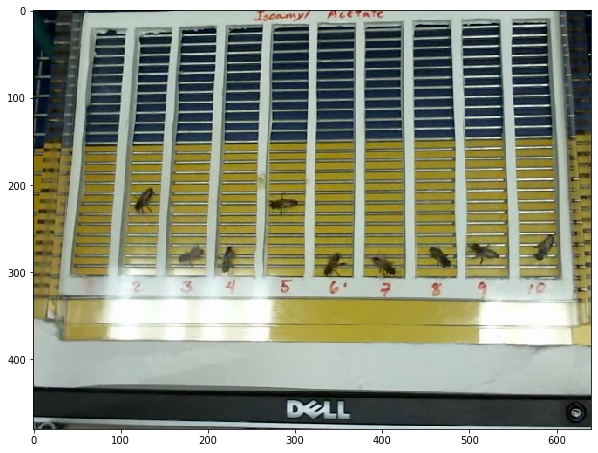

In [2]:
ON_img = io.imread('./Data/ON_0.jpeg')
print(f'dType: {ON_img.dtype}')
print(f'Shape: {ON_img.shape}')
plt.figure(figsize=(10,8))
plt.imshow(ON_img);

In [3]:
# warp whole image
src2 = np.array([[70, 25], [600, 9], [609, 312], [40, 310]])
dst2 = np.array([[65, 10], [600, 10], [600, 315], [65, 315]])

img_projected = hf.projective_transf(ON_img, src=src2, dst=dst2, output_shape=(325, 640))

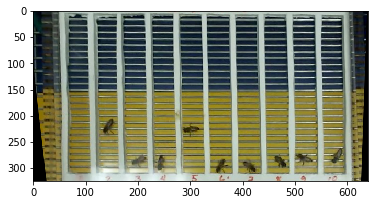

In [4]:
plt.imshow(img_projected);

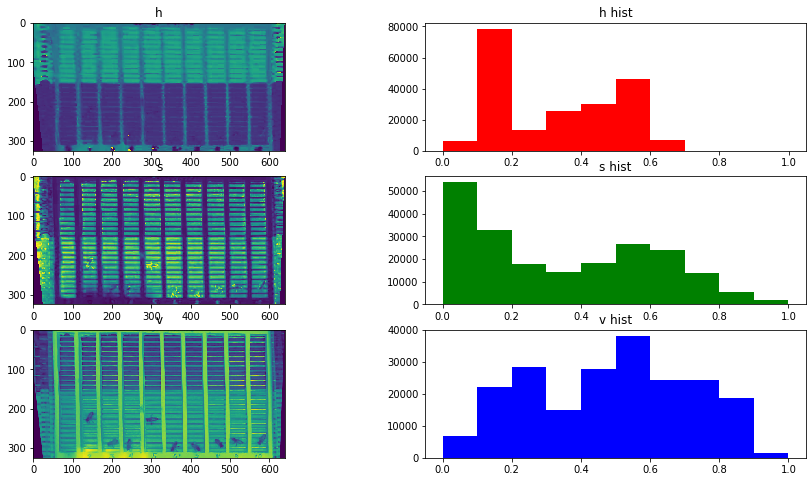

In [5]:
hsv_img_projected = color.rgb2hsv(img_projected)
hf.plt_channels_with_hist(hsv_img_projected, titles=('h','s','v'))

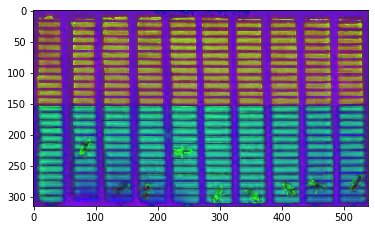

In [6]:
# Crop image
hsv_img_projected = hsv_img_projected[0:315 , 60:600, :]
plt.imshow(hsv_img_projected)

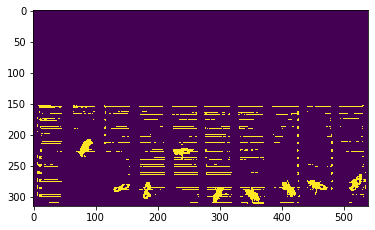

In [7]:
# Compute Mask
mask = (hsv_img_projected[...,0] <= 0.25) & (hsv_img_projected[...,2] <= 0.4)
plt.imshow(mask);

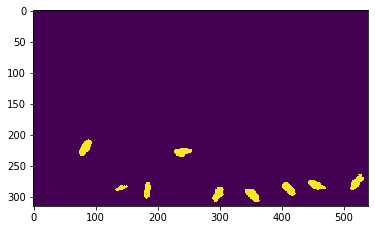

In [8]:
# Remove noise
import scipy.ndimage as ndi

img_med = ndi.median_filter(mask, size=9)
plt.imshow(img_med, interpolation='nearest');

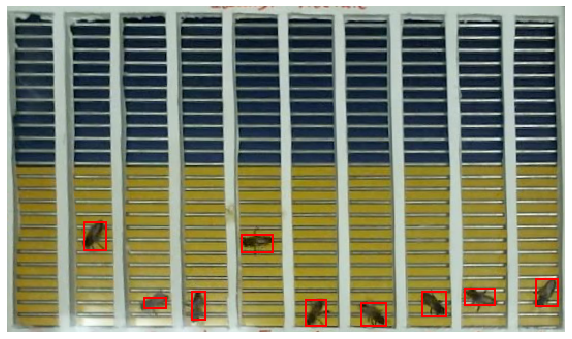

In [9]:
# label image regions
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches
from skimage import measure

label_bee = skimage.measure.label(img_med)
image_label_overlay = color.label2rgb(label_bee, image=color.hsv2rgb(hsv_img_projected))

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(color.hsv2rgb(hsv_img_projected))

coords = []

for region in regionprops(label_bee):

    if region.area >= 110:
        
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        
        x = (maxc + minc) // 2
        y = (maxr + minr) // 2
        
        coords.append((x, y))   

# plt.close(plt.gcf()) Use this to free memory if running a script.
plt.axis('off')
# Uncomment the line bellow to save the image.
# plt.savefig('test_seg.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [10]:
for x, y in coords:
    print(x,y)

84 221
242 229
522 276
457 281
184 289
412 287
142 286
298 296
354 298


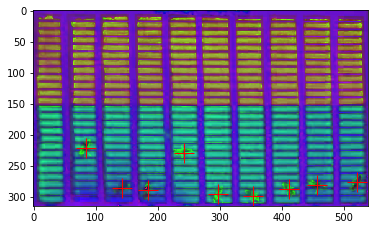

In [11]:
# See if the centroid of the bees was computed correctly.
plt.imshow(hsv_img_projected)

for x,y in coords:
    if x !=0:
        plt.plot(x,y, '+r', markersize=20)

# The code bellow was used for running test

In [12]:
def add_bounding_boxes(img, bboxes):
    '''
    bboxes order: [(minr1, minc1, maxr1, maxc1), (minr2, minc2, maxr2, maxc2), ... , (minrN, mincN, maxrN, maxcN)]
    '''
    color = np.array([0, 255, 0], dtype=np.uint8)
    for minr, minc, maxr, maxc in bboxes:
        img[minr, minc:maxc, :] = color # _ (up)
        img[minr:maxr, minc, :] = color # | (left)
        img[maxr, minc:maxc, :] = color # _ (bottom)
        img[minr:maxr, maxc, :] = color # | (right)

def crop(img, x_range, y_range):
        x_start, x_finish = x_range
        y_start, y_finish = y_range
        return img[y_start : y_finish, x_start : x_finish, :]

In [13]:
''' Testing my add_bounding_boxes function '''
# Label the bees
label_bee = skimage.measure.label(img_med)

bboxes = [] 
count = 0
for region in skimage.measure.regionprops(label_bee):
     
    if region.area >= 100:
        min_row, min_col, max_row, max_col = region.bbox
        # print(min_row, min_col, max_row, max_col)
        bboxes.append([min_row, min_col, max_row, max_col])


# Display
img_test = color.hsv2rgb(hsv_img_projected)
# img_test = img_as_ubyte(img_test)
add_bounding_boxes(img_test, bboxes)
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(img_test)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dType: uint8
Shape: (480, 640, 3)


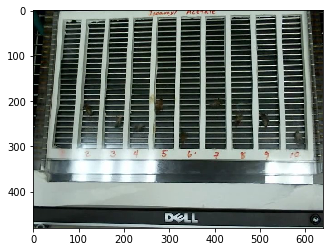

In [14]:
OFF_img = io.imread('./Data/OFF_0.jpeg')
print(f'dType: {OFF_img.dtype}')
print(f'Shape: {OFF_img.shape}')
plt.imshow(OFF_img);

In [15]:
img_projected = hf.projective_transf(OFF_img, src=src2, dst=dst2, output_shape=(325, 640))
plt.imshow(img_projected);

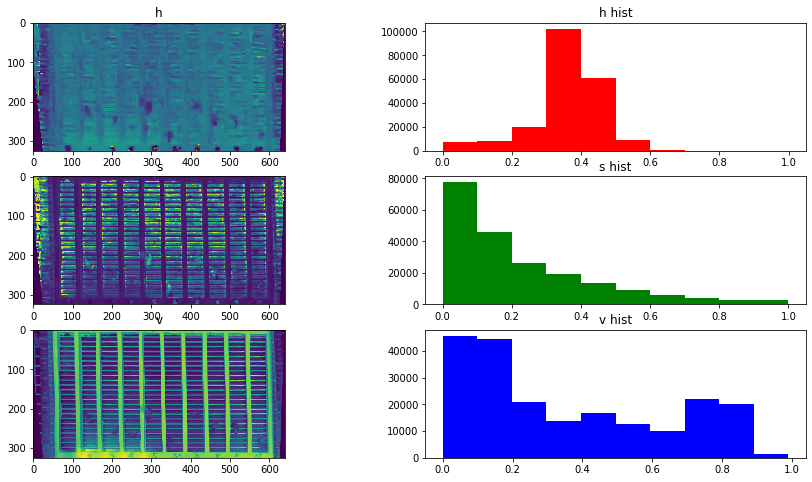

In [16]:
hsv_img_projected = color.rgb2hsv(img_projected)
hf.plt_channels_with_hist(hsv_img_projected, titles=('h','s','v'))

In [17]:
# Create 325 x 640 Empty canvas of white color
arr = np.ones((325, 640, 3), dtype=np.uint8) * 255
color = np.array([255, 0, 0], dtype=np.uint8)
minr, minc, maxr, maxc = 31, 515, 52, 531 # 284, 282, 306, 308
bounding_box = (minc, minr, maxc, maxr)

# Shape: (325, 640, 3)
# min_r: 282 ; max_r 308
# min_c: 284 ; max_c 306
# minr, minc, maxr, maxc


arr[minr, minc:maxc, :] = color # _ (up)
arr[minr:maxr, minc:minc+2, :] = color # | (left)

arr[maxr, minc:maxc, :] = color # _ (bottom)
arr[minr:maxr, maxc-2:maxc, :] = color # | (right)

plt.imshow(arr)
plt.show()

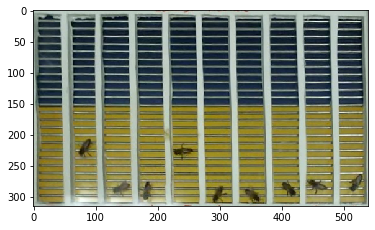

In [19]:
crop_test_img = hf.projective_transf(ON_img, src=src2, dst=dst2, output_shape=(325, 640))
cropped_img = crop(crop_test_img, x_range=(60, 600), y_range=(0, 315))
plt.imshow(cropped_img)